In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/CC.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Using Smote Liberary to do Re-sampling unbalanced class 

In [3]:
resample = SMOTE(sampling_strategy='minority')

# Loading Dataset

In [4]:
data = pd.read_csv('/kaggle/input/CC.csv')

In [5]:
data.shape

(284807, 32)

In [6]:
Y = data['Class']
X = data.iloc[:,0:31] 

In [7]:
X

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,284803,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,284804,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,284805,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,284806,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


# Unbalance class plot

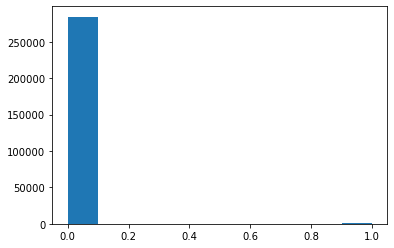

In [8]:
plt.hist(Y)
plt.show()

# Count of classes

In [9]:
Y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Just a small check for correlation between features

In [10]:
"""plt.subplots(figsize=(20,10))
sns.heatmap(X.corr(),vmin=-1,vmax=1,annot=True)"""

'plt.subplots(figsize=(20,10))\nsns.heatmap(X.corr(),vmin=-1,vmax=1,annot=True)'

In [11]:
X.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,142404.000000,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,82216.843396,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,1.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,71202.500000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,142404.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,213605.500000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,284807.000000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [12]:
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts,GridSearchCV

# Using L2 normalization because there may be a chance feature named: Time and Unname0 will dominate in training

In [13]:
normalizer = Normalizer(norm='l2')

In [14]:
X = normalizer.fit_transform(X)

In [15]:
Normalized_data = pd.DataFrame(X)

# Resampling of dataset because target class were highly unbalanced

In [16]:
Normalized_data_resampled,resampled_class = resample.fit_resample(Normalized_data,Y)

# Count of values after re-sampling

In [17]:
resampled_class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

# After Resampling the data we have effectively balanced our target classes

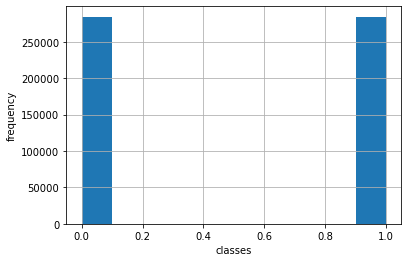

In [18]:
plt.hist(resampled_class)
plt.grid()
plt.xlabel('classes')
plt.ylabel('frequency')
plt.show()

In [19]:
train_data = Normalized_data_resampled
train_target = resampled_class

# Splitting data in training and testing into 80:20 ratio i.e. 80% for training and 20% for testing

In [20]:
xtrain,xtest,ytrain,ytest = tts(train_data,train_target,test_size=0.2,random_state=0)

# Importing most usefull liberary for creating deep learning network

In [22]:
import tensorflow as tf
import keras 

# Creating neural network for classification purpose

In [23]:
model = keras.Sequential([
        keras.layers.Dense(units = 64,input_shape=(31,)),
        keras.layers.Dense(units = 32,activation='relu',kernel_initializer='random_normal'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(units = 16,activation='relu',kernel_initializer='random_normal'),
        keras.layers.Dense(units = 8,activation='relu',kernel_initializer='random_normal'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(units = 4,activation='relu',kernel_initializer='random_normal'),
        keras.layers.Dense(units = 1,activation='sigmoid'),
        
])

# Architecture of my own created neural network

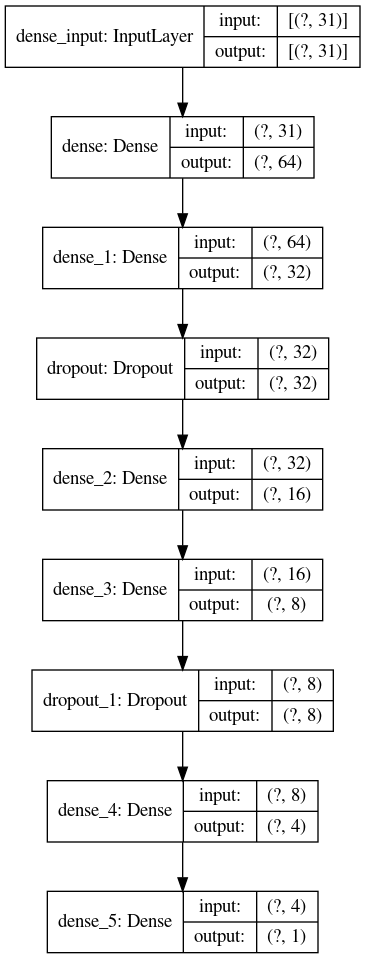

In [42]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Using Nadam optimization algorithm:
# Optimizer that implements the NAdam algorithm.

# Much like Adam is essentially RMSprop with momentum, Nadam is Adam with Nesterov momentum.

In [24]:
optimizer = keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [25]:
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

# I have used Early Stopping technique for removing Overfitting problem.

In [26]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('val_loss')<0.3144):
                self.model.stop_training = True

In [27]:
callback = myCallback()

In [28]:
model.fit(xtrain,ytrain,batch_size=2000,epochs=100,verbose=2,validation_split=0.2,callbacks=[callback])

Epoch 1/100
182/182 - 1s - loss: 0.6851 - accuracy: 0.5538 - val_loss: 0.6791 - val_accuracy: 0.5673
Epoch 2/100
182/182 - 1s - loss: 0.6794 - accuracy: 0.5707 - val_loss: 0.6782 - val_accuracy: 0.5693
Epoch 3/100
182/182 - 1s - loss: 0.6782 - accuracy: 0.5726 - val_loss: 0.6772 - val_accuracy: 0.5709
Epoch 4/100
182/182 - 1s - loss: 0.6770 - accuracy: 0.5736 - val_loss: 0.6759 - val_accuracy: 0.5740
Epoch 5/100
182/182 - 1s - loss: 0.6759 - accuracy: 0.5740 - val_loss: 0.6747 - val_accuracy: 0.5743
Epoch 6/100
182/182 - 1s - loss: 0.6745 - accuracy: 0.5732 - val_loss: 0.6728 - val_accuracy: 0.5741
Epoch 7/100
182/182 - 1s - loss: 0.6731 - accuracy: 0.5744 - val_loss: 0.6703 - val_accuracy: 0.5751
Epoch 8/100
182/182 - 1s - loss: 0.6686 - accuracy: 0.5758 - val_loss: 0.6598 - val_accuracy: 0.5843
Epoch 9/100
182/182 - 1s - loss: 0.6635 - accuracy: 0.5668 - val_loss: 0.6898 - val_accuracy: 0.5614
Epoch 10/100
182/182 - 1s - loss: 0.6663 - accuracy: 0.5662 - val_loss: 0.6258 - val_accura

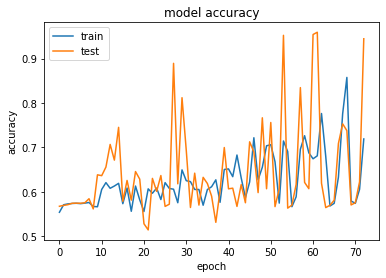

In [29]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

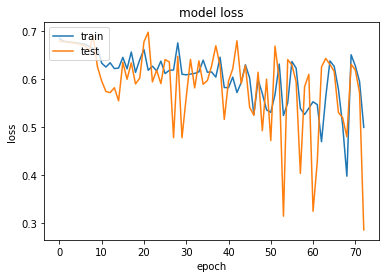

In [30]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
prediction = model.predict_classes(xtest,verbose=1)

3554/3554 [==============================] - 5s 1ms/step


In [36]:
prediction

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

In [33]:
len(prediction), ytest.shape

(113726, (113726,))

In [39]:
from sklearn.metrics import accuracy_score,classification_report,balanced_accuracy_score

In [37]:
print(accuracy_score(ytest,prediction))

0.944058526634191


# By having a look over this classification report one can easy say that my model is 94% accurate in predicting whether a transaction is a fraud or genuiene.

In [38]:
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     56724
           1       0.99      0.89      0.94     57002

    accuracy                           0.94    113726
   macro avg       0.95      0.94      0.94    113726
weighted avg       0.95      0.94      0.94    113726



# From here we can see clearly that my model is 94% accurate in prediction.

In [40]:
print(balanced_accuracy_score(ytest,prediction))

0.9441801093058044


In [41]:
model.save('Transaction_fraud_detector.h5')

# This model still require some admendments because there will be a further extension of this model in future, It also require some external features like User Location and time stamps for making the classification process more robust than this. Rest detailed information I will share in my report.